In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import calplot

In [2]:
df = pd.read_csv("BPD_Part_1_Victim_Based_Crime_Data.csv", parse_dates=['CrimeDate'])

This is aggregating the count on a per day and a per week basis as each crime is listed on its own row.

In [3]:
df2 = pd.concat([df['CrimeDate'], df['Total_Incidents']], axis=1)

dfDay = df2.groupby(pd.Grouper(key="CrimeDate", freq="1D")).sum()

dfWeek = df2.groupby(pd.Grouper(key="CrimeDate", freq="1W")).sum()

These are basic plots of the aggregated data to get a better understanding of it

Text(0, 0.5, 'Weekly Incidents')

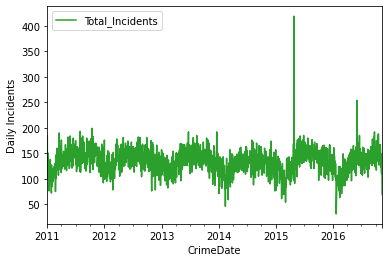

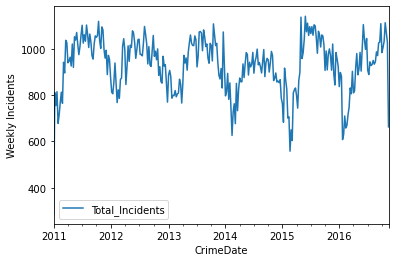

In [4]:
dfDay.plot(color = 'C2')
plt.ylabel("Daily Incidents")

dfWeek.plot(color = 'C0')
plt.ylabel("Weekly Incidents")

This max value is dramatically higher than all the other values. I'm interested in looking that day up to see if there is a reason for that higher value, such as large protests, or if that is possibly a reporting error

In [5]:
print(dfDay[dfDay.Total_Incidents == dfDay.Total_Incidents.max()])

            Total_Incidents
CrimeDate                  
2015-04-27              419


There were large protests in Baltimore that day over the arrest of Freddie Gray, so I don't believe this reading is an error and I won't clean it out of the dataset

In [6]:
print(len(dfWeek))
print(len(dfDay))

307
2143


Since isolation forests are generally trained on sets of n = 256, I would be concerned about overfitting the data with the weekly aggregate. 

I include it out of curiosity and to show that the function can be used interchangably, should I just not?

In [7]:
import isoForestImport as iFI

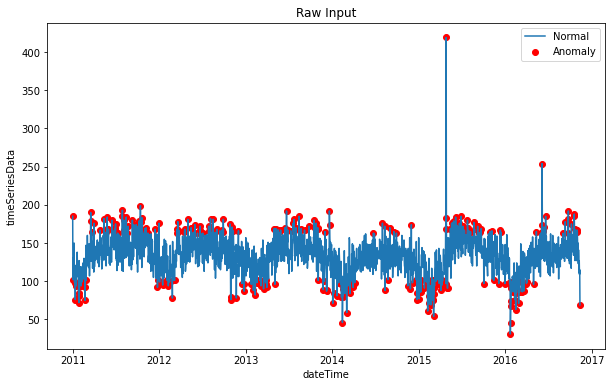

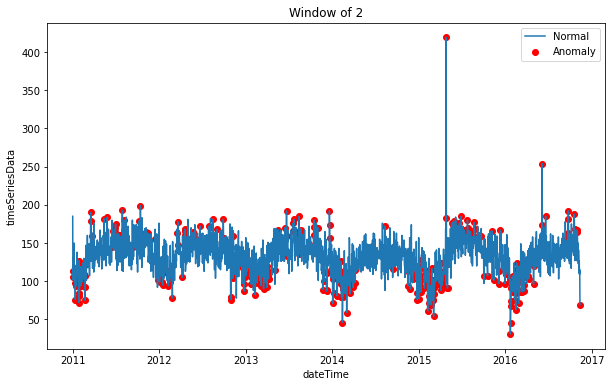

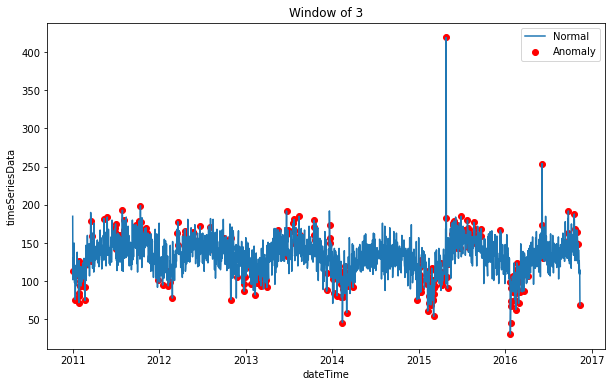

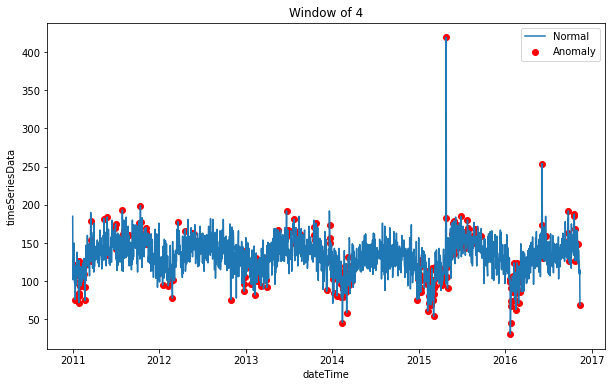

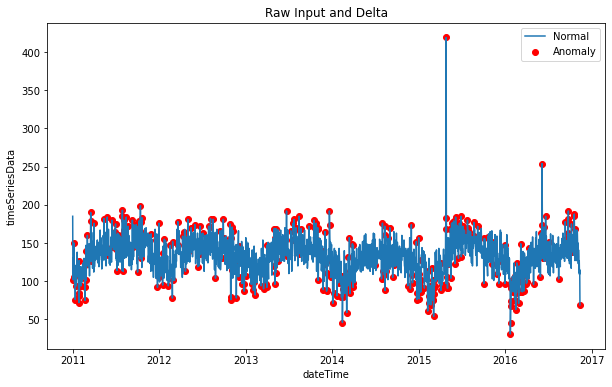

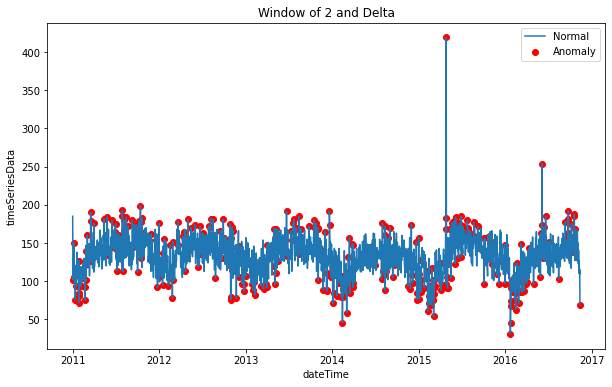

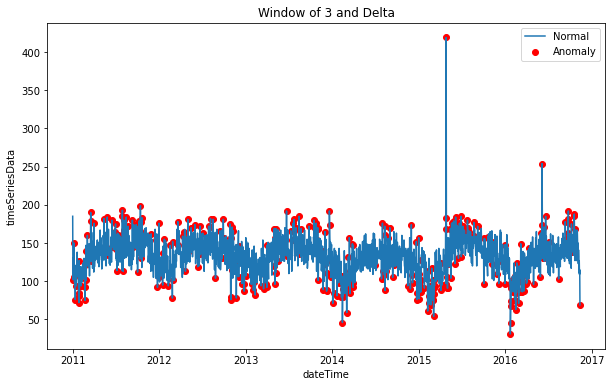

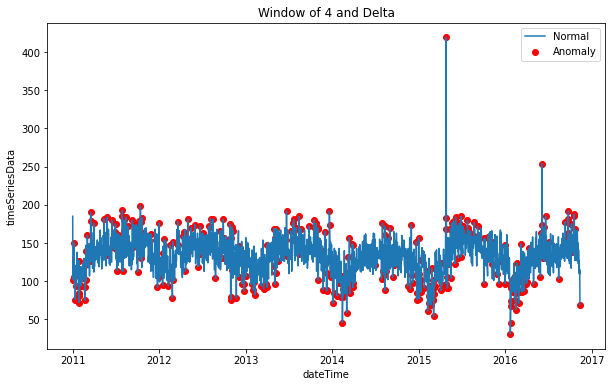

In [8]:
windowList = [2,3,4]

dayResults = iFI.getIF(dfDay['Total_Incidents'], dfDay.index, windowList, x = "dateTime", y = "timeSeriesData")


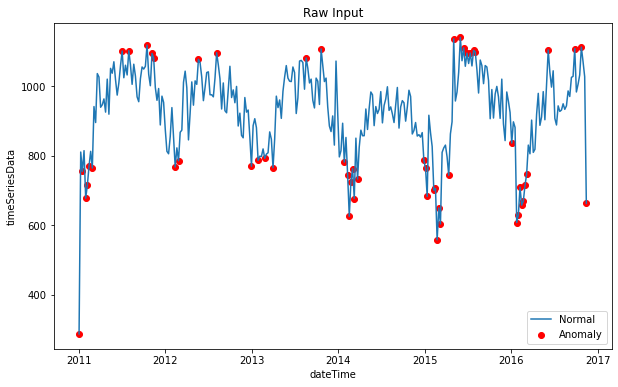

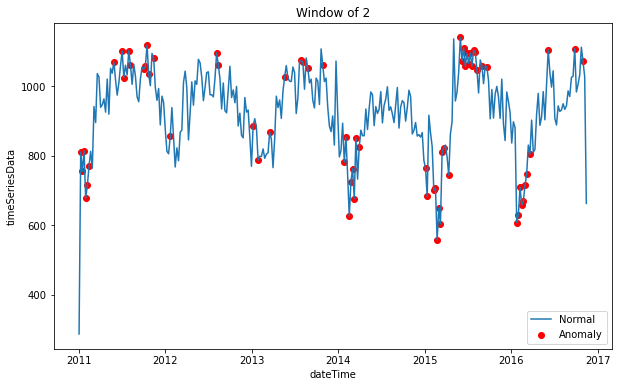

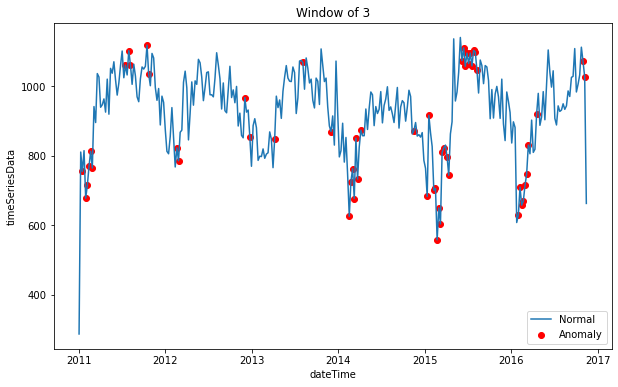

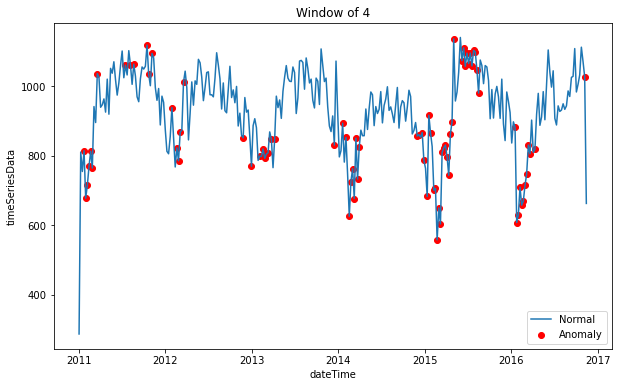

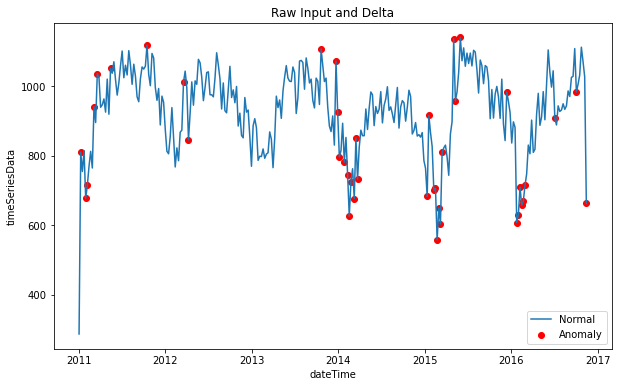

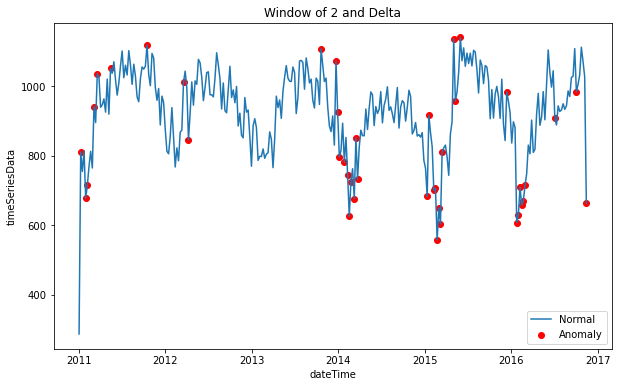

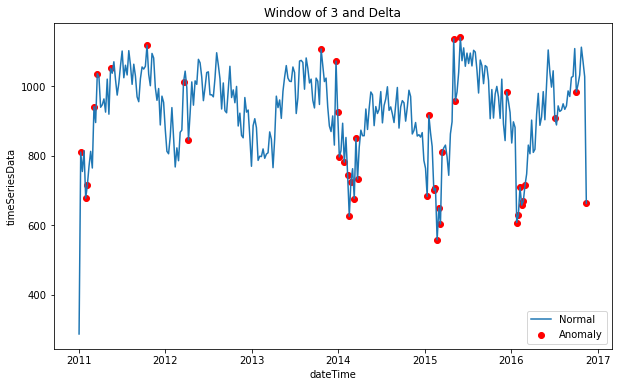

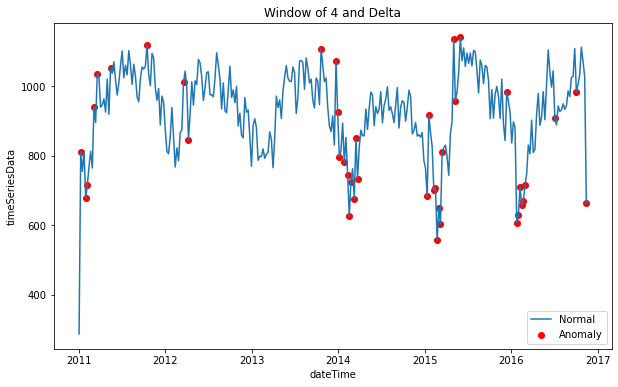

In [9]:
windowList = [2,3,4]

weekResults = iFI.getIF(dfWeek['Total_Incidents'], dfWeek.index, windowList, x = "dateTime", y = "timeSeriesData")

In [10]:
dayResults.head()

,baseScores,baseAnomaly,baseIncidents,Date,deltaScores,deltaAnomaly,deltaIncidents,window2Scores,window2Anomaly,window2Incidents,...,window4Incidents,windowDelta2Scores,windowDelta2Anomaly,windowDelta2Incidents,windowDelta3Scores,windowDelta3Anomaly,windowDelta3Incidents,windowDelta4Scores,windowDelta4Anomaly,windowDelta4Incidents
0,-0.191713,-1,185,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.010865,-1,102,2011-01-02,-0.168747,-1.0,-83.0,0.073233,1.0,143.5,...,NaN,-0.168747,-1.0,-83.0,-0.168747,-1.0,-83.0,-0.168747,-1.0,-83.0
2,0.014211,1,106,2011-01-03,0.038346,1.0,4.0,-0.025424,-1.0,104.0,...,NaN,0.038346,1.0,4.0,0.038346,1.0,4.0,0.038346,1.0,4.0
3,0.032767,1,113,2011-01-04,0.061865,1.0,7.0,-0.007166,-1.0,109.5,...,126.5,0.061865,1.0,7.0,0.061865,1.0,7.0,0.061865,1.0,7.0
4,0.049293,1,131,2011-01-05,0.059106,1.0,18.0,0.037485,1.0,122.0,...,113.0,0.059106,1.0,18.0,0.059106,1.0,18.0,0.059106,1.0,18.0


In [11]:
weekResults.head()

,baseScores,baseAnomaly,baseIncidents,Date,deltaScores,deltaAnomaly,deltaIncidents,window2Scores,window2Anomaly,window2Incidents,...,window4Incidents,windowDelta2Scores,windowDelta2Anomaly,windowDelta2Incidents,windowDelta3Scores,windowDelta3Anomaly,windowDelta3Incidents,windowDelta4Scores,windowDelta4Anomaly,windowDelta4Incidents
0,-0.350693,-1,287,2011-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.033063,1,811,2011-01-09,-0.251424,-1.0,524.0,-0.301521,-1.0,549.0,...,NaN,-0.251424,-1.0,524.0,-0.251424,-1.0,524.0,-0.251424,-1.0,524.0
2,-0.040933,-1,755,2011-01-16,0.022090,1.0,-56.0,-0.028697,-1.0,783.0,...,NaN,0.022090,1.0,-56.0,0.022090,1.0,-56.0,0.022090,1.0,-56.0
3,0.024835,1,815,2011-01-23,0.054149,1.0,60.0,-0.020849,-1.0,785.0,...,667.00,0.054149,1.0,60.0,0.054149,1.0,60.0,0.054149,1.0,60.0
4,-0.061754,-1,678,2011-01-30,-0.072109,-1.0,-137.0,-0.066148,-1.0,746.5,...,764.75,-0.072109,-1.0,-137.0,-0.072109,-1.0,-137.0,-0.072109,-1.0,-137.0
